## Auto Summarization
Main Reference: 
1. TextRank: https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
2. SentenceEmbedding: 
3. InformationRetrievalAndTextMining: 

In [1]:
import pandas as pd

/anaconda3/envs/ibm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ibm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import numpy as np
import jieba

In [ ]:
def cut(string): return ' '.join(jieba.cut(string))

In [3]:
news_file = 'sqlResult_1558435.csv'

In [10]:
news_content = pd.read_csv(news_file, encoding='gb18030')

In [11]:
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [16]:
pure_content = pd.DataFrame()

In [17]:
pure_content['content'] = news_content['content']

In [21]:
pure_content = pure_content.fillna('')

In [29]:
pure_content['tokenized_content'] = pure_content['content'].apply(cut)

In [44]:
pure_content.head()

,content,tokenized_content
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理...
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,（ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...


## Train the word vector

In [32]:
from gensim.models import FastText

In [45]:
with open('all_corpus.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(pure_content['tokenized_content'].tolist()))

In [35]:
from gensim.models.word2vec import LineSentence

In [36]:
model = FastText(LineSentence('all_corpus.txt'), window=5, size=35, iter=10, min_count=1)

In [195]:
from functools import reduce

In [ ]:
pure_content['tok,,'].tolist() 
[[''], [''], [''], [''], [''], [''], [''], ['']]

In [ ]:
reduce(lambda a, b: a + b, pure_content['tokenized_content'].tolist()).split()

In [198]:
tokeners = [t for l in pure_content['tokenized_content'].tolist() for t in l.split()]

In [199]:
tokeners[:10]

['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']

## Counts the words occurence 

In [200]:
from collections import Counter

In [201]:
tokener_counter = Counter(tokeners)

In [205]:
frequence = {w: count/len(tokeners) for w, count in tokener_counter.items()}

In [209]:
occurences_frequences = sorted(list(frequence.values()), reverse=True)

In [210]:
X = range(len(occurences_frequences))

In [212]:
import matplotlib.pyplot as plt

/anaconda3/envs/ibm/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


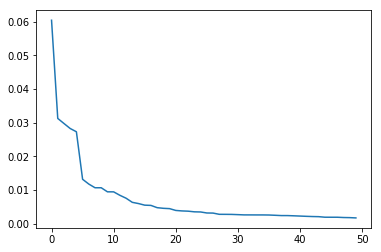

In [215]:
plt.plot(X[:50], occurences_frequences[:50])

In [43]:
tokener_counter

Counter({'此': 33626,
         '外': 131119,
         ' ': 22994303,
         '，': 1360799,
         '自': 63122,
         '本': 53481,
         '周': 25145,
         '（': 212529,
         '6': 97092,
         '月': 205888,
         '1': 318823,
         '2': 275952,
         '日': 278379,
         '）': 212782,
         '起': 33322,
         '除': 9959,
         '小': 51778,
         '米': 21697,
         '手': 52263,
         '机': 65294,
         '等': 65840,
         '5': 139557,
         '款': 10820,
         '型': 18257,
         '其': 43675,
         '余': 11292,
         '已': 39217,
         '暂': 2975,
         '停': 7879,
         '更': 32969,
         '新': 272577,
         '发': 144500,
         '布': 38003,
         '含': 3394,
         '开': 88713,
         '版': 6059,
         '/': 33916,
         '体': 89027,
         '验': 16007,
         '内': 55577,
         '测': 10007,
         '稳': 9068,
         '定': 46305,
         '不': 125980,
         '受': 30189,
         '影': 32483,
         '响': 12528,
   

## TextRank

In [46]:
import networkx

In [47]:
import random

In [50]:
def genrate_name(length=3):  return ''.join(chr(random.randint(65, 73)) for _ in range(length))

In [54]:
genrate_name()

'AFB'

In [55]:
graph = {
    'Yao': ['Guo', 'Wang', 'Tian', 'Tim'] + [genrate_name() for _ in range(6)], 
    'Guo': ['Li'] + [genrate_name() for _ in range(5)], 
    'Wang': ['Li_2'] + [genrate_name() for _ in range(5)], 
    'Li': [genrate_name() for _ in range(3)], 
    'Li_2': [genrate_name() for _ in range(1)]
}

In [56]:
graph

{'Yao': ['Guo',
  'Wang',
  'Tian',
  'Tim',
  'BHD',
  'DCC',
  'GII',
  'EEC',
  'CIB',
  'ECB'],
 'Guo': ['Li', 'EAD', 'DAA', 'EII', 'CID', 'FEA'],
 'Wang': ['Li_2', 'IAI', 'DGB', 'AEG', 'ECH', 'CGB'],
 'Li': ['GEH', 'CIF', 'DBD'],
 'Li_2': ['AEB']}

In [58]:
social_network = networkx.graph.Graph()

In [61]:
help(social_network.add_edges_from)

Help on method add_edges_from in module networkx.classes.graph:

add_edges_from(ebunch_to_add, **attr) method of networkx.classes.graph.Graph instance
    Add all the edges in ebunch_to_add.
    
    Parameters
    ----------
    ebunch_to_add : container of edges
        Each edge given in the container will be added to the
        graph. The edges must be given as as 2-tuples (u, v) or
        3-tuples (u, v, d) where d is a dictionary containing edge data.
    attr : keyword arguments, optional
        Edge data (or labels or objects) can be assigned using
        keyword arguments.
    
    See Also
    --------
    add_edge : add a single edge
    add_weighted_edges_from : convenient way to add weighted edges
    
    Notes
    -----
    Adding the same edge twice has no effect but any edge data
    will be updated when each duplicate edge is added.
    
    Edge attributes specified in an ebunch take precedence over
    attributes specified via keyword arguments.
    
    Example

In [62]:
for vertex, edge in graph.items():
    for v in edge:
        social_network.add_edges_from([(vertex, v)])

In [64]:
%matplotlib inline

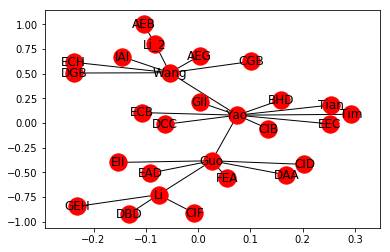

In [65]:
networkx.draw_networkx(social_network)

In [67]:
ranking_result = networkx.pagerank(social_network)

In [70]:
sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.1747698412634544),
 ('Wang', 0.12616099221117885),
 ('Guo', 0.12434209154337311),
 ('Li', 0.07600909782512963),
 ('Li_2', 0.04007465697366682),
 ('AEB', 0.022586982681035123),
 ('GEH', 0.021706946858994478),
 ('CIF', 0.021706946858994478),
 ('DBD', 0.021706946858994478),
 ('IAI', 0.020875426652805028),
 ('DGB', 0.020875426652805028),
 ('AEG', 0.020875426652805028),
 ('ECH', 0.020875426652805028),
 ('CGB', 0.020875426652805028),
 ('EAD', 0.020654738077342236),
 ('DAA', 0.020654738077342236),
 ('EII', 0.020654738077342236),
 ('CID', 0.020654738077342236),
 ('FEA', 0.020654738077342236),
 ('Tian', 0.020410584159305276),
 ('Tim', 0.020410584159305276),
 ('BHD', 0.020410584159305276),
 ('DCC', 0.020410584159305276),
 ('GII', 0.020410584159305276),
 ('EEC', 0.020410584159305276),
 ('CIB', 0.020410584159305276),
 ('ECB', 0.020410584159305276)]

In [66]:
networkx.pagerank(social_network)

{'Yao': 0.1747698412634544,
 'Guo': 0.12434209154337311,
 'Wang': 0.12616099221117885,
 'Tian': 0.020410584159305276,
 'Tim': 0.020410584159305276,
 'BHD': 0.020410584159305276,
 'DCC': 0.020410584159305276,
 'GII': 0.020410584159305276,
 'EEC': 0.020410584159305276,
 'CIB': 0.020410584159305276,
 'ECB': 0.020410584159305276,
 'Li': 0.07600909782512963,
 'EAD': 0.020654738077342236,
 'DAA': 0.020654738077342236,
 'EII': 0.020654738077342236,
 'CID': 0.020654738077342236,
 'FEA': 0.020654738077342236,
 'Li_2': 0.04007465697366682,
 'IAI': 0.020875426652805028,
 'DGB': 0.020875426652805028,
 'AEG': 0.020875426652805028,
 'ECH': 0.020875426652805028,
 'CGB': 0.020875426652805028,
 'GEH': 0.021706946858994478,
 'CIF': 0.021706946858994478,
 'DBD': 0.021706946858994478,
 'AEB': 0.022586982681035123}

## TextRank Page

In [71]:
pure_content.head()

,content,tokenized_content
0,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,此外 ， 自 本周 （ 6 月 12 日 ） 起 ， 除 小米 手机 6 等 15 款 机型...
1,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙 835 作为 唯一 通过 Windows 10 桌面 平台 认证 的 ARM 处理...
2,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,此前 的 一加 3T 搭载 的 是 3400mAh 电池 ， DashCharge 快充 规...
3,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,这是 6 月 18 日 在 葡萄牙 中部 大 佩德罗 冈 地区 拍摄 的 被 森林 大火 烧...
4,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,（ 原 标题 ： 44 岁 女子 跑 深圳 约会 网友 被 拒 ， 暴雨 中 裸身 奔走 …...


In [138]:
lengthes_of_text = map(len, pure_content['content'].tolist())

In [139]:
list(lengthes_of_text)[:20]

[177,
 329,
 216,
 45,
 1674,
 1056,
 657,
 4093,
 3665,
 755,
 169,
 1467,
 487,
 774,
 1137,
 331,
 293,
 495,
 289,
 1707]

In [189]:
networkx.__path__

['/anaconda3/envs/ibm/lib/python3.6/site-packages/networkx']

In [256]:
import matplotlib.font_manager as fm
fp1 = fm.FontProperties(fname="/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf")
# how to set chinese display: 
# https://knowlab.wordpress.com/2016/05/25/networkx-%E7%B9%AA%E5%9C%96%E9%A1%AF%E7%A4%BA%E4%B8%AD%E6%96%87%E7%9A%84%E8%A7%A3%E6%B1%BA%E6%96%B9%E6%B3%95/

def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = networkx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [100]:
first_content = pure_content.iloc[1]['tokenized_content']

In [140]:
first_content_continous = pure_content.iloc[4]['content']

In [121]:
first_content_continous.replace(',', ' ').split()

['骁龙835作为唯一通过Windows',
 '10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。',
 '报道称，微软已经拿到了一些新的源码，以便Windows',
 '10更好地理解big.little架构。',
 '资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。',
 '按计划，今年Q4，华硕、惠普、联想将首发骁龙835',
 'Win10电脑，预计均是二合一形态的产品。',
 '当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows',
 '10桌面平台。']

In [122]:
import re

In [142]:
pattern = re.compile('[。，,.]')
token_by_sentence_first = pattern.sub(' ', first_content_continous).split()

In [170]:
token_by_sentence_first[:10]

['（原标题：44岁女子跑深圳约会网友被拒',
 '暴雨中裸身奔走……）',
 '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身',
 '行走在南坪快速上',
 '期间还起了轻生年头',
 '一辅警发现后赶紧为其披上黄衣',
 '并一路劝说她',
 '那么事发时',
 '到底都发生了些什么呢？',
 '南都记者带您一起还原现场']

In [177]:
sentence_graph = get_connect_graph_by_text_rank()

/anaconda3/envs/ibm/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


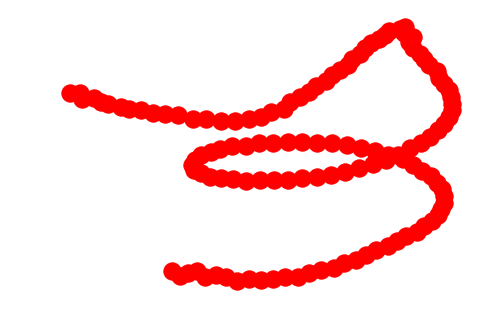

In [178]:
networkx.draw(sentence_graph)

In [146]:
ranking_sentence = networkx.pagerank(sentence_graph)

In [148]:
first_content_continous

'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的

In [228]:
def split_sentence(sentence):
    pattern = re.compile('[。，,.]：')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

In [288]:
' '.join(get_summarization_simple_with_text_rank(sharp_news, constraint=250))

'2013 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？ 近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 660 OPPO 660 OPPO 660 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。 在 5'

In [284]:
def get_summarization_simple_with_text_rank(text, constraint=200):
    return get_summarization_simple(text, sentence_ranking_by_text_ranking, constraint)

In [283]:
def sentence_ranking_by_text_ranking(split_sentence):
    sentence_graph = get_connect_graph_by_text_rank(' '.join(split_sentence))
    ranking_sentence = networkx.pagerank(sentence_graph)
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence

In [287]:
def get_summarization_simple(text, score_fn, constraint=200):
    sub_sentence = split_sentence(text)
    ranking_sentence = score_fn(sub_sentence)
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized

## 课间休息 15min 
## 10：37 课程继续

In [162]:
pure_content.iloc[6]['content']

'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n'

In [161]:
' '.join(get_summarization_simple(pure_content.iloc[6]['content']))

'2013 年退出中国市场 但是今年 3 月份官方突然宣布回归中国 预示着很快就有夏普新机在中国登场了 那么 第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？ 近日 一款型号为 FS8016 660 处理器 骁龙 660 260 核心设计 集成 Adreno 512 660 处理器 OPPO 骁龙 660 OPPO 660 2013 EDGEST 302SH 至今 夏普手机推出了多达 28 款的全面屏手机 在 5 月份的媒体沟通会上 惠普罗忠生表示：“我敢打赌 12 个月之后 在座的各位手机都会换掉 因为全面屏时代的到来'

In [175]:
pure_content.iloc[2496]['content']

'原标题：中国墨子号卫星首次实现1200公里量子纠缠，震惊国外专家\r\n雷锋网按：在量子加密通信的研究领域，如何长距离传输纠缠光子一直是个很大的难题。不过最近我国的科学家们，利用去年八月发射的墨子号量子卫星，在这件事上取得了一些突破。研究者们成功从太空中，往相距约 1200 公里的云南丽江和青海德令哈地面站发送了纠缠光子对。本文由雷锋网编译。\r\n去年年底的某个晴朗的夜晚，一个绿色的星点出现在中缅边界的地平线附近。正在丽江郊外观测站的物理学家，中国科技大学教授陆朝阳观测到了这一现象，他说：“这很像一个非常明亮的绿色星体。”\r\n陆教授和他的同事们必须赶快采取行动。因为那个绿色星体其实是来自于 300 英里上空正在运行的卫星发出的一道激光，它就像一个灯塔预示着太空飞行器的位置。激光点在空中快速移动着，10 分钟后就会消失在地平线中。所以这个由中国的多个科学机构研究者组成的团队，正在用望远镜紧紧盯着这道绿光，努力捕捉着其中最重要的东西：这个卫星上由特殊晶体制造的一种微妙的单一红外光子。最终他们过滤掉绿光，锁定了他们的“猎物”——一个过去从未发出射过的量子信号。\r\n这项实验是量子密码这种新技术中的一次关键测试。量子密码就是像光子这样的量子传输安全信息的技术。但是众所周知，脆弱的量子不易进行传递，如果你试图利用光纤来传递它们，超过 150 英里后，信号就会失效，这种性质使得量子密码在全国或者世界范围内传递消息时起不到什么作用。\r\n所以科学家们一直在研究如何利用卫星来进行长距离的量子传送。但是在此之前，还没有人做到如此远的距离。在这项实验中，中国科学家在两个相距 750 英里的地面站点和卫星之间传递单一光子，创造了距离最远的新记录（两站分别是青海德令哈站和云南丽江高美古站，两站距离1203公里）。参与这项工作的巴黎量子计算中心副主管 Eleni Diamanti 说：“这个实验对扩展远距离量子沟通网络来讲拥有里程碑式的意义，这毫无疑问。”\r\n去年 8 月，在戈壁滩的酒泉卫星发射中心，中国发射了造价一亿美元的量子卫星“墨子号”，专门用来进行空间级别的量子实验。该卫星上搭载了一套复杂的激光系统、反射镜面系统和一中特殊的晶体，当激光反射在晶体上时，它会创造出一对处于纠缠态的光子。晶体一次可以制造 6 百万对光子，但是地面上的两个站点每秒只能探测到大约一对光子。陆教

In [174]:
for index in random.sample(list(range(len(pure_content))), 30):
    content = pure_content.iloc[index]['content']
    if len(content) > 1000:
        print('{}----'.format(index))
        print(' '.join(get_summarization_simple(content)))

2496----
如何长距离传输纠缠光子一直是个很大的难题 不过最近我国的科学家们 利用去年八月发射的墨子号量子卫星 在这件事上取得了一些突破 研究者们成功从太空中 往相距约 1200 ” 300 Diamanti ” 300 ” 在理想状态下 这串密钥绝对不会被窃取（现实中的硬件设备并不完美 探测器在探测连续单一光子时表现不佳 这可能让我们误以为信息被窃取了 黑客也可以通过发射强光来追踪你的探测器） 中国的量子卫星发射和这项实验是科研人员长期努力的结果 Jennewein Jennewein ” ” Diamanti 年打造一个覆盖全球的量子卫星通信网络 ”


In [147]:
sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)

[('一名女子言语不清', 0.008761809701694283),
 ('行走在南坪快速上', 0.008761809701694281),
 ('期间还起了轻生年头', 0.00853806788025346),
 ('淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话', 0.00853806788025346),
 ('一辅警发现后赶紧为其披上黄衣', 0.008371719895408159),
 ('去年6月7号上午', 0.008371719895408159),
 ('并一路劝说她', 0.008245759268329758),
 ('女方从20岁到50岁不等', 0.008245759268329758),
 ('那么事发时', 0.00815029910456809),
 ('男子迷奸网友拍418个视频', 0.00815029910456809),
 ('@SJ-李赫海i：这个交警很暖有木有！', 0.008078401421739694),
 ('到底都发生了些什么呢？', 0.008078401421739692),
 ('南都记者带您一起还原现场', 0.008024087516959199),
 ('@Tomchlee：蜀黍帅！', 0.008024087516959199),
 ('南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警）', 0.007983207314774927),
 ('@中華云盾：警察……警察就是群众最需时申出援手', 0.007983207314774927),
 ('一位外表高大帅气', 0.007952624377193676),
 ('@火心聆听心灵：点赞交警', 0.007952624377193674),
 ('说话略带些腼腆的90后青年', 0.007929884597094566),
 ('同时也感谢交警蜀黍', 0.007929884597094566),
 ('刘青介绍', 0.007913142240506744),
 ('想想自己的家人', 0.007913142240506744),
 ('@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？', 0.007900964870248895),
 ('6月16日早上7时36分', 0.00790096487024889

In [183]:
keywords_graph = get_connect_graph_by_text_rank(first_content, window=5)

AttributeError: 'str' object has no attribute 'decode'

In [102]:
ranking_words = networkx.pagerank(keywords_graph)

In [96]:
from matplotlib import rcParams
rcParams['font.family'] = '/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'

In [97]:
%matplotlib inline

/anaconda3/envs/ibm/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


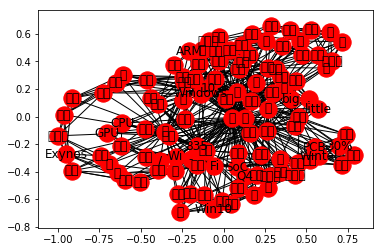

In [181]:
networkx.draw_networkx(keywords_graph)

In [191]:
sorted(ranking_words.items(), key=lambda x: x[1], reverse=True)[:10]

[('，', 0.04971796909107254),
 ('的', 0.032169208603727614),
 ('。', 0.02860228225909264),
 ('、', 0.02771502328849811),
 ('骁龙', 0.017759850248184172),
 ('Windows', 0.015115542829056361),
 ('10', 0.014661459543306039),
 ('835', 0.01417195081727616),
 ('桌面', 0.013938442660657342),
 ('平台', 0.012843338290542764)]

## Sentence Embedding Based

In [216]:
max(frequence.values())

0.06041265049289309

In [219]:
'测试机' in model.wv

True

In [221]:
sentence_embedding('这是 一台 测试机')

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


array([ 0.8209102 ,  0.06840289, -0.53223395, -0.735713  , -0.24113654,
       -0.95707494,  0.9833474 , -0.74113065,  0.31412685, -2.0497446 ,
        2.0620635 , -1.0265256 ,  1.092847  , -0.853559  , -1.8556648 ,
       -0.93276614,  0.2515715 , -1.020293  , -0.05743051, -1.8814358 ,
        0.5998357 , -0.06820183,  2.357323  ,  0.83137274, -1.2140547 ,
       -3.565163  ,  0.9846055 , -0.77957344, -0.2384383 ,  1.178894  ,
       -0.96436185,  3.207032  ,  0.897161  , -0.5350476 ,  0.40027657],
      dtype=float32)

In [347]:
def sentence_embedding(sentence, cut):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-4
    
    global frequence
    
    max_fre = max(frequence.values())
    
    words = cut(sentence).split()
    
    sentence_vec = np.zeros_like(model.wv['测试'])
    
    words = [w for w in words if w in model]
    
    for w in words:
        weight = alpha / (alpha + frequence.get(w, max_fre))
        sentence_vec += weight * model.wv[w]
    
    sentence_vec /= len(words)
    # Skip the PCA
    return sentence_vec

## Treat the whole text as a long sentence.

```

# 程序伪代码
sentence_vector = get_sentence_embedding(text) 
# sentence vector is represeted as semantic similarity
# therefore, sentence vector is representing the whole text semantic infomation.

correlations = []

for sub_sentence in text:
    sub_sen_vec = get_sentence_embedding(sub_sentence)
    correlation = similarity(sub_sen_vec, sentence_vector)
    correlations.append(correlation)
```

In [225]:
sharp_news = pure_content.iloc[6]['content']

In [234]:
from scipy.spatial.distance import cosine

In [293]:
def get_corrlations(text, cut_fn):
    if isinstance(text, list): text = ' '.join(text)
        
    sub_sentences = split_sentence(text)
    sentence_vector = sentence_embedding(text, cut_fn)
        
    correlations = {}
    
    for sub_sentence in sub_sentences:
        sub_sen_vec = sentence_embedding(sub_sentence, cut_fn)
        correlation = cosine(sentence_vector, sub_sen_vec)
        correlations[sub_sentence]= correlation

    return sorted(corrlations.items(), key=lambda x: x[1], reverse=True)

In [294]:
from functools import partial

In [296]:
# f(x, y) 
#f(x, y=1) # is a partial funtion

In [297]:
corrlations_with_global_cut = partial(get_corrlations, cut_fn=cut)
corrlations_with_global_cut = partial(get_corrlations, cut_fn=another_cut)

In [ ]:
def new_summarization_algorithm(): pass

In [275]:
help(get_summarization_simple)

Help on function get_summarization_simple in module __main__:

get_summarization_simple(text, score_fn, constraint=200)



In [298]:
def get_summarization_simple_by_sen_embedding(text, constraint=200):
    return get_summarization_simple(text, corrlations_with_global_cut, constraint)

In [301]:
' '.join(get_summarization_simple_by_sen_embedding(sharp_news, constraint=200))

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


'2013 年退出中国市场，但是今年 3 近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 660 处理器，配备有 4GB 660 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。 660 OPPO R11。骁龙 660 820 OPPO 与高通签署了排他性协议，可以独占两三个月时间。 660 2013 年推出全球首款全面屏手机 EDGEST 302SH 28 在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12'

In [308]:
danger_news = pure_content.iloc[4]['content']

In [343]:
def get_sequent_correlation(text):
    sub_sentence = split_sentence(text)
    corrleations = corrlations_with_global_cut(sub_sentence)
    correlation_with_sequent = [(sen, corrlations[sen]) for sen in sub_sentence]
    return correlation_with_sequent

In [344]:
sub_sentence = get_sequent_correlation(sharp_news)
sub_sentence

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


[('虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于', 0.12964648008346558),
 ('2013', 0.799274817109108),
 ('年退出中国市场，但是今年', 0.30392885208129883),
 ('3', 1.0643607676029205),
 ('月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？',
  0.12079513072967529),
 ('近日，一款型号为', 0.24997162818908691),
 ('FS8016', 1.0181109383702278),
 ('的夏普神秘新机悄然出现在', 0.19331711530685425),
 ('GeekBench', 1.0206618532538414),
 ('的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙', 0.04037266969680786),
 ('660', 0.8802495077252388),
 ('处理器，配备有', 0.2487751841545105),
 ('4GB', 0.8022160232067108),
 ('的内存。骁龙', 0.1610603928565979),
 ('660', 0.8802495077252388),
 ('是高通今年最受瞩目的芯片之一，采用', 0.1596813201904297),
 ('14', 1.0912874341011047),
 ('纳米工艺，八个', 0.20669978857040405),
 ('Kryo', 1.261707752943039),
 ('260', 0.9195282161235809),
 ('核心设计，集成', 0.2239118218421936),
 ('Adreno', 1.0604844614863396),
 ('512', 0.9973529151175171),
 ('GPU', 0.6360308527946472),
 ('和', 0.5902390778064728),
 ('X12', 1.0669185444712639),
 ('LTE', 0.6847786903381348),
 (

/anaconda3/envs/ibm/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


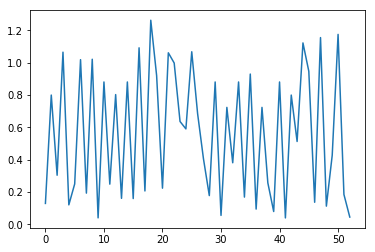

In [345]:
plt.plot(range(len(sub_sentence)), [y for _, y in correlation_with_sequent])

In [324]:
sub_seq_of_danger = get_sequent_correlation(danger_news)

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


In [325]:
sub_seq_of_danger

[]

/anaconda3/envs/ibm/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['/Users/mqgao/Downloads/SourceHanSerifSC-Regular.otf'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


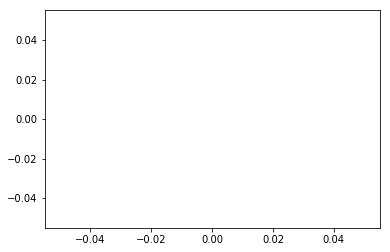

In [322]:
plt.plot(range(len(sub_seq_of_danger)), [y for _, y in sub_seq_of_danger])

## Supplementary

这些对TextRank和Sentence Emebdding都是有效用的。 

### 1. KNN make it more fluently
> 对于一个sub_sentence来说，它的重要性，取决于他本身的重要性和周围的句子(neighbors)的重要性的综合；
### 2. Title is very important is it exists
> 如果一个文章有标题，那么，其实这个标题已经包含了很多它的摘要信息， 在考虑语义建模的时候，就应该对标题更加重要的考虑；
### 3. The keywords count; 
> 关键字是很重要的，如果我们能够比较准确的提取出来关键词/字，然后对关键字/词包含的句子增加其权重； 
### 4. Position counts;
> 对于一些文本，文章，例如一个故事的这种文章，那么他的textRank， sentence embedding 会发现，并不会出现很明显有些句子是重要的，有些句子不重要的，如果plot他的曲线的话，我们这个时候就要考虑他的位置，开头，结尾，增加一些权重；
### 5. Topics count; 
> LDA主题模型，得到的主题分布，我们可以用每句话和的出来的这些主题进行相似度对比，我们不仅仅是是考虑他的整个的text， 我们还有考虑主题；



In [246]:
corrlations = get_corrlations(sharp_news, cut)

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  


In [ ]:
get_summarization_simple()

[('Kryo', 1.261707752943039),
 ('5', 1.174242302775383),
 ('28', 1.1545579135417938),
 ('EDGEST', 1.1215405240654945),
 ('14', 1.0912874341011047),
 ('X12', 1.0669185444712639),
 ('3', 1.0643607676029205),
 ('Adreno', 1.0604844614863396),
 ('GeekBench', 1.0206618532538414),
 ('FS8016', 1.0181109383702278),
 ('512', 0.9973529151175171),
 ('302SH', 0.9462662227451801),
 ('820', 0.9291320592164993),
 ('260', 0.9195282161235809),
 ('660', 0.8802495077252388),
 ('4GB', 0.8022160232067108),
 ('2013', 0.799274817109108),
 ('OPPO', 0.7231224775314331),
 ('LTE', 0.6847786903381348),
 ('GPU', 0.6360308527946472),
 ('和', 0.5902390778064728),
 ('年推出全球首款全面屏手机', 0.5124390721321106),
 ('在', 0.4273228049278259),
 ('调制解调器。', 0.4060221314430237),
 ('R11。骁龙', 0.38088226318359375),
 ('年退出中国市场，但是今年', 0.30392885208129883),
 ('与高通签署了排他性协议，可以独占两三个月时间。', 0.2567896246910095),
 ('近日，一款型号为', 0.24997162818908691),
 ('处理器，配备有', 0.2487751841545105),
 ('核心设计，集成', 0.2239118218421936),
 ('纳米工艺，八个', 0.20669978857040405)

In [231]:
sharp_news

'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n'

['虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于',
 '2013',
 '年退出中国市场，但是今年',
 '3',
 '月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？',
 '近日，一款型号为',
 'FS8016',
 '的夏普神秘新机悄然出现在',
 'GeekBench',
 '的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙',
 '660',
 '处理器，配备有',
 '4GB',
 '的内存。骁龙',
 '660',
 '是高通今年最受瞩目的芯片之一，采用',
 '14',
 '纳米工艺，八个',
 'Kryo',
 '260',
 '核心设计，集成',
 'Adreno',
 '512',
 'GPU',
 '和',
 'X12',
 'LTE',
 '调制解调器。',
 '当前市面上只有一款机子采用了骁龙',
 '660',
 '处理器，那就是已经上市销售的',
 'OPPO',
 'R11。骁龙',
 '660',
 '尽管并非旗舰芯片，但在多核新能上比去年骁龙',
 '820',
 '强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于',
 'OPPO',
 '与高通签署了排他性协议，可以独占两三个月时间。',
 '考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙',
 '660',
 '新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从',
 '2013',
 '年推出全球首款全面屏手机',
 'EDGEST',
 '302SH',
 '至今，夏普手机推出了多达',
 '28',
 '款的全面屏手机。',
 '在',
 '5',
 '月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12',
 '个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”']